In [13]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [11]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [7]:
import os
datapath = os.path.join("/Users", "sanghyub", "")

In [8]:
oecd_bli = pd.read_csv('2015oecd.csv', thousands=',')
gdp_per_capita = pd.read_csv('WEO_Data.csv', thousands=',',delimeter='/t',encoding = latin1','na_values='n/a')


SyntaxError: invalid syntax (<ipython-input-8-c17795c0e1f2>, line 2)

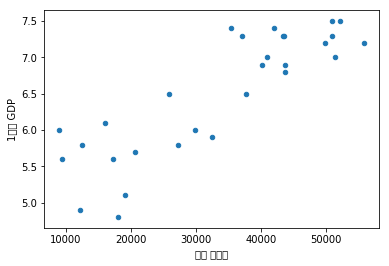

[[ 5.96242338]]


In [14]:
# 데이터 적재
oecd_bli = pd.read_csv(datapath + "2015oecd.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "WEO_Data.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# 데이터 준비
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# 데이터 시각화
ax = country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
ax.set(xlabel="삶의 만족도", ylabel="1인당 GDP")
plt.show()

# 선형 모델 선택
model = sklearn.linear_model.LinearRegression()

# 모델 훈련
model.fit(X, y)

# 키프로스에 대한 예측
X_new = [[22587]]  # 키프로스 1인당 GDP
print(model.predict(X_new)) # 결과 [[ 5.96242338]]

In [16]:
#KNN 
#model = sklearn.linear_model.LinearRegression()
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)
X_new = [[22587]]
print(model.predict(X_new))

[[ 5.76666667]]
